<a href="https://colab.research.google.com/github/ialara/or-student/blob/main/student_submissions/Kubasak_Homework_4_Questions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SIMULATION HOMEWORK 4

## Due: To Nacho on Monday, June 6, 2022

## Name: **Matthew Kubasak**

## Overall score: **??** / 35 pts

This homework will be a little different from the other three.  You job will be to recreate the figures in the *Non-Monotonicity, Chaos, and Combat Modeling* and *A Study of Non-Monotonicity and Randomnes in Combat Models*.  Modify as needed the code below that I showed in class for each of the problems. Provide your code with each problem, discuss what you changed, and the result.

#### 1.	[5 points] Recreate Figure 3 from *Non-Monotonicity, Chaos, and Combat Modeling*.  Note that the parameters for their figures are given in Table B.1 on page 52. Make sure the increments in initial force strengths are 10 (not 1 or prepare for a loooong wait). Even with increments of 10, it took about 15 minutes on my computer to calculate all of the points. Use a circular marker with size 1 in your plot so you can see the monotonicities.

All I had to do was set the marker size to 1, then tell a loop to run through all the starting values of red and blue, plotting a point only if red won. The run time was less than 15 minutes, so it went well.

In [ ]:
#Copied from Dewar_Sim_Figures
import numpy as np
import matplotlib.pyplot as plt

def attrition(friendly, enemy, factor): 
    return max(0,friendly - factor*enemy)

def reinforcements(period, forces, reinf, force_ratio, blocks, thresholds):
    activated = [0, 0] #reinforcements called up
    for iside, side in enumerate(sides):
        reinforce_details = ' '
        neg_red = 2*iside-1
        if blocks[iside][0] > 0 and np.sum(reinf[iside][max(0,period-blocks[iside][2]):period]) == 0:
            if force_ratio*neg_red >= thresholds[iside][0]*neg_red:
                reinforce_details = 'Force Ratio: {0:5.3f} {1:4.1f} '.format(force_ratio, thresholds[iside][0])
            if forces[iside][period] <= thresholds[iside][1]:
                reinforce_details = reinforce_details + 'Engaged: {0:5.3f} {1:4.1f}'.format(forces[iside][period], thresholds[iside][1])
        if reinforce_details != ' ':
            #print(side+' reinforces at', period, reinforce_details)
            blocks[iside][0] -= 1
            activated[iside] = blocks[iside][1]
    return blocks, activated

def withdrawn(period, forces, force_ratio, thresholds):
    withdraw = [False, '']
    for iside, side in enumerate(sides):
        withdraw_details = ' '
        neg_red = 2*iside-1 
        if force_ratio*neg_red >= thresholds[iside][0]*neg_red:
            withdraw_details = 'Force Ratio: {0:5.3f} {1:4.1f} '.format(force_ratio, thresholds[iside][0])
        if forces[iside][period] <= thresholds[iside][1]:
            withdraw_details = withdraw_details + 'Engaged: {0:5.3f} {1:4.1f}'.format(forces[iside][period], thresholds[iside][1])
        if withdraw_details != ' ':
            if withdraw[0]: withdraw[1] += ' & '
            withdraw[0] = True
            withdraw[1] += side
            #print(side+' withdraws at', period, withdraw_details)
    return withdraw


In [ ]:
def Dewar_Sim(init_red, init_blue):
    red = []
    red = np.append(red, init_red)
    red_reinf = []

    blue = []
    blue = np.append(blue, init_blue)
    blue_reinf = []

    blocks = [[5, 300, 70], [5, 300, 70]]
    reinforce_thresholds = [[2.5, 0.8*red[0]],[4.0, 0.8*blue[0]]]
    withdraw_thresholds = [[1.5, 0.7*red[0]],[10.0, 0.7*blue[0]]]

    period = 0
    FR = red[0]/blue[0]
    withdraw = withdrawn(period, (red, blue), FR, withdraw_thresholds)
    while not(withdraw[0]):
        #Reinforcements
        blocks, activated = reinforcements(period, (red, blue), (red_reinf, blue_reinf), FR, blocks, reinforce_thresholds)
        red_reinf = np.append(red_reinf, activated[0])
        blue_reinf = np.append(blue_reinf, activated[1])
        #Add prior reinforcements, if any
        if period >=70:
            blue[period] += blue_reinf[period-70]
            red[period] += red_reinf[period-70]
        #Atrrition calculation
        blue = np.append(blue, attrition(blue[period], red[period], 1/2048))
        red = np.append(red, attrition(red[period], blue[period], 1/512))

        period += 1
        FR = red[period]/blue[period]
        withdraw = withdrawn(period, (red, blue), FR, withdraw_thresholds)

    return withdraw[1]

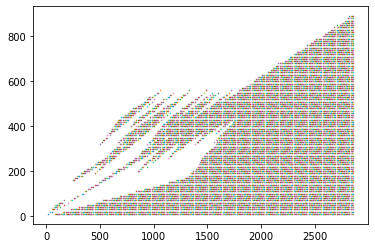

In [ ]:

sides = ['red', 'blue']
#Figure 1
#for red in range(1500,3500,10):
#    winner = np.append(winner, Dewar_Sim(red, 839)=='blue')
#Figure 2
for blue in range(10,1010,10):
  for red in range(10,2860,10):
      if(Dewar_Sim(red, blue)=="blue"):
        plt.plot(red, blue,marker=".", markersize=1)

plt.title("Colors=Red Win, White=Blue Win")
plt.xlabel("R_0")
plt.ylabel("B_0")



# PROBLEM 2 BEGINS HERE

The following table summarizes the parameter variations for figures 1-6 in *A Study of Non-Monotonicity and Randomness in Combat Models*.

| Parameter | Figure 1  | Figure 2 | Figure 3 | Figure 4 | Figure 5 | Figure 6 |
| --------  | -------- | -------- | -------- | -------- | -------- | ------ |
| Red force ratio reinforcement threshold | 2.5 | $U(2.375, 2.625)$ | $U(2, 3)$ | 2.5 | 2.5 | $U(2, 3)$ |
| Red force strength reinforcement threshold | 0.8 | $U(0.76, 0.84)$ | $U(0.64, 0.96)$ | 0.8 | 0.8 | $U(0.64, 0.96)$ |
| Blue force ratio reinforcement threshold | 4 | $U(3.8, 4.2)$ | $U(3.2, 4.8)$ | 4 | 4 | $U(3.2, 4.8)$ |
| Blue force strength reinforcement threshold | 0.8 | $U(0.76, 0.84)$ | $U(0.64, 0.96)$ | 0.8 | 0.8 | $U(0.64, 0.96)$ |
| Red force ratio withdraw threshold | 1.5 | $U(1.425, 1.575)$ | $U(1.2, 1.8)$ | 1.5 | 1.5 | $U(1.2, 1.8)$ |
| Red force strength withdraw threshold | 0.7 | $U(0.665, 0.735)$ | $U(0.56, 0.84)$ | 0.7 | 0.7 | $U(0.56, 0.84)$ |
| Blue force ratio withdraw threshold | 10 | $U(9.5, 10.5)$ | $U(8, 12)$ | 10 | 10 | $U(8, 12)$ |
| Blue force strength withdraw threshold | 0.7 | $U(0.665, 0.735)$ | $U(0.56, 0.84)$ | 0.7 | 0.7 | $U(0.56, 0.84)$ |
| Red attrition factor threshold | 2048 | 2048 | 2048 | $N(2048, 4.525)$ | $N(2048, 45.255)$ | $N(2048, 45.255)$ |
| Blue attrition factor threshold | 512 | 512 | 512 | $N(512, 2.263)$ | $N(512, 22.627)$ | $N(512, 22.627)$ |

Replicate Figure 1-6 from Tom Lucas’ A Study of Non-Monotonicity and Randomness in Combat Models.  The initial blue forces are 500.  The initial red forces vary from 500 to 3,000 in steps of 10.  Run the model for 6,000 time periods to make sure all replications finish. To reduce the time required to produce these plots from “crazy long” to just “very long,” use 100 replications rather than the 1,000 that Tom used. Use the values or distributions for the parameters associated with each figure as give in the table below. Your figures, of course, will have greater variance, but should have an overall trend that replicates his figures, except for figure 5.  I don’t know how he got that figure, but my calculations yield something different.  Caution!  It took me between 30 and 60 minutes to create each of these figures.  So, after you hit the “run” button, do OJT, answer email, talk to your family or friends, check your social media, put on a good movie, etc.

#### 2.	[5 points] Recreate Figure 1.

I just changed the values for Red and Blue for this one, then flipped the y-axis and relabeled the x-axis.

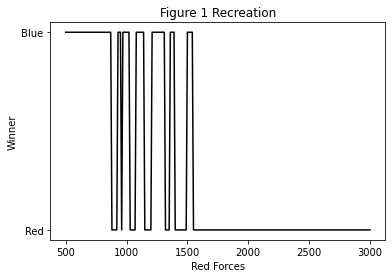

In [ ]:
#copied from Dewar_Sym_Figures
winner = []
sides = ['red', 'blue']

for red in range(500,3010,10):
   winner = np.append(winner, Dewar_Sim(red, 500)=='blue')

red_forces = np.arange(1500, 3500, 10)
#Note: I address negatives by multiplying winner*(-1) and just applying labels to the new y points.
fig, ax = plt.subplots()

plt.plot(-winner, c='k')
plt.title("Figure 1 Recreation")
plt.xlabel("Red Forces")
plt.ylabel("Winner")
plt.yticks((0.0, -1.0), ('Blue', 'Red'))
labels = [0,500,1000,1500,2000,2500,3000]
ax.set_xticklabels(labels)
plt.show()

#### 3. [5 points] Recreate Figure 2.

I changed all the inbuilt parameters to variables that would be easy to find and change later. Then, I used random.uniform to take the random values for all of them.

In [ ]:
# OK so basically I have to randomize some of these starting variables

def Adj_Dewar_Sim(init_red, init_blue, RedFRatReinfThre, RedFStrReinfThre, BlueFRatReinfThre, BlueFStrReinfThre, RedFRatWithdrawThre, RedFStrWithdrawThre, BlueFRatWithdrawThre, BlueFStrWithdrawThre, RedAttrThre, BlueAttrThre):
    red = []
    red = np.append(red, init_red)
    red_reinf = []

    blue = []
    blue = np.append(blue, init_blue)
    blue_reinf = []

    blocks = [[5, 300, 70], [5, 300, 70]]

    #THESE ARE WHAT YOURE REPLACING FOR FIGs 2, 3, 6
    ##############################################
    reinforce_thresholds = [[RedFRatReinfThre, RedFStrReinfThre*red[0]],[BlueFRatReinfThre, BlueFStrReinfThre*blue[0]]]
    withdraw_thresholds = [[RedFRatWithdrawThre, RedFStrWithdrawThre*red[0]],[BlueFRatWithdrawThre, BlueFStrWithdrawThre*blue[0]]]

    period = 0
    FR = red[0]/blue[0]
    withdraw = withdrawn(period, (red, blue), FR, withdraw_thresholds)
    while not(withdraw[0]):
        #Reinforcements
        blocks, activated = reinforcements(period, (red, blue), (red_reinf, blue_reinf), FR, blocks, reinforce_thresholds)
        red_reinf = np.append(red_reinf, activated[0])
        blue_reinf = np.append(blue_reinf, activated[1])
        #Add prior reinforcements, if any
        if period >=70:
            blue[period] += blue_reinf[period-70]
            red[period] += red_reinf[period-70]
        #Atrrition calculation
        #THESE ARE WHAT YOURE REPLACING FOR FIGs 4, 5, 6!!!!!
        ####################################################
        blue = np.append(blue, attrition(blue[period], red[period], 1/RedAttrThre))
        red = np.append(red, attrition(red[period], blue[period], 1/BlueAttrThre))

        period += 1
        FR = red[period]/blue[period]
        withdraw = withdrawn(period, (red, blue), FR, withdraw_thresholds)

    return withdraw[1]

#Defaults:
RedFRatReinfThre = 2.5
RedFStrReinfThre = 0.8
BlueFRatReinfThre = 4
BlueFStrReinfThre = 0.8
RedFRatWithdrawThre = 1.5 
RedFStrWithdrawThre = 0.7
BlueFRatWithdrawThre = 10
BlueFStrWithdrawThre = 0.7
RedAttrThre = 2048
BlueAttrThre = 512


In [ ]:
#Ok so now I'm setting up a function to take a random value of each of those variables
import random

def OneRunFigOne(R_0, B_0):
  RedFRatReinfThre = random.uniform(2.375,2.625)
  RedFStrReinfThre = random.uniform(0.76,0.84)
  BlueFRatReinfThre = random.uniform(3.8, 4.2)
  BlueFStrReinfThre = random.uniform(0.76,0.84)
  RedFRatWithdrawThre = random.uniform(1.425, 1.575)
  RedFStrWithdrawThre = random.uniform(0.665, 0.735)
  BlueFRatWithdrawThre = random.uniform(9.5,10.5)
  BlueFStrWithdrawThre = random.uniform(0.665, 0.735)
  RedOrBlue = Adj_Dewar_Sim(R_0, B_0, RedFRatReinfThre, RedFStrReinfThre, BlueFRatReinfThre, BlueFStrReinfThre, RedFRatWithdrawThre, RedFStrWithdrawThre, BlueFRatWithdrawThre, BlueFStrWithdrawThre, RedAttrThre, BlueAttrThre)
  if(RedOrBlue) == 'red':
    return 1
  else:
    return 0 

#OK so now we're running this function 100 times for each value of Red.
#B_0 is always 500
B_0 = 500

def ThisRResult(R_0):
  RunningSum = 0
  for i in range(1,101):
    RunningSum = RunningSum + OneRunFigOne(R_0, B_0)
  finalProportion = RunningSum/100
  return(finalProportion)

#Test:
#ThisRResult(1000)


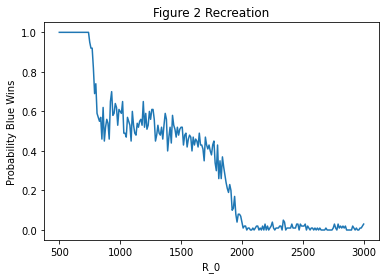

In [ ]:

ManyReds = range(500,3010,10)
ProbabilityBWins=[0]*len(ManyReds)

for i in range(0,len(ManyReds)):
  ProbabilityBWins[i] = ThisRResult(ManyReds[i])

plt.plot(ManyReds,ProbabilityBWins)
plt.title("Figure 2 Recreation")
plt.xlabel("R_0")
plt.ylabel("Probability Blue Wins")
#plt.yticks((0.0, -1.0), ('Blue', 'Red'))
#labels = [0,500,1000,1500,2000,2500,3000]
#ax.set_xticklabels(labels)
plt.show()


#

#### 4. [5 points] Recreate Figure 3.

Same as fig. 2 but with different uniform distributions.

In [ ]:
#This is copied from the last problem, and I just edited the parameter ranges.
import random

def OneRunFigThree(R_0, B_0):
  RedFRatReinfThre = random.uniform(2,3)
  RedFStrReinfThre = random.uniform(0.64,0.96)
  BlueFRatReinfThre = random.uniform(3.2, 4.8)
  BlueFStrReinfThre = random.uniform(0.64,0.96)
  RedFRatWithdrawThre = random.uniform(1.2, 1.8)
  RedFStrWithdrawThre = random.uniform(0.56, 0.84)
  BlueFRatWithdrawThre = random.uniform(8,12)
  BlueFStrWithdrawThre = random.uniform(0.56, 0.84)
  RedOrBlue = Adj_Dewar_Sim(R_0, B_0, RedFRatReinfThre, RedFStrReinfThre, BlueFRatReinfThre, BlueFStrReinfThre, RedFRatWithdrawThre, RedFStrWithdrawThre, BlueFRatWithdrawThre, BlueFStrWithdrawThre, RedAttrThre, BlueAttrThre)
  if(RedOrBlue) == 'red':
    return 1
  else:
    return 0 

#Same as before...
#B_0 is always 500
B_0 = 500

def ThisRResult(R_0):
  RunningSum = 0
  for i in range(1,101):
    RunningSum = RunningSum + OneRunFigThree(R_0, B_0)
  finalProportion = RunningSum/100
  return(finalProportion)

#Test:
#ThisRResult(1000)

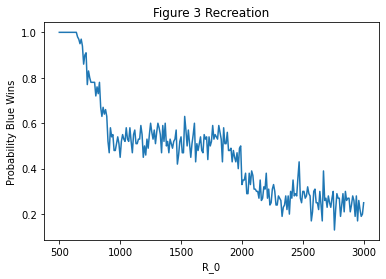

In [ ]:
ManyReds = range(500,3010,10)
ProbabilityBWins=[0]*len(ManyReds)

for i in range(0,len(ManyReds)):
  ProbabilityBWins[i] = ThisRResult(ManyReds[i])

plt.plot(ManyReds,ProbabilityBWins)
plt.title("Figure 3 Recreation")
plt.xlabel("R_0")
plt.ylabel("Probability Blue Wins")
#plt.yticks((0.0, -1.0), ('Blue', 'Red'))
#labels = [0,500,1000,1500,2000,2500,3000]
#ax.set_xticklabels(labels)
plt.show()

#### 5. [5 points] Recreate Figure 4.

Now, I set most of the parameters back to constants and use np.random.normal to randomly select the attrition factors.

In [ ]:
#This is copied from the last problem, and I just edited the parameter ranges.
import random

RedFRatReinfThre = 2.5
RedFStrReinfThre = 0.8
BlueFRatReinfThre = 4
BlueFStrReinfThre = 0.8
RedFRatWithdrawThre = 1.5 
RedFStrWithdrawThre = 0.7
BlueFRatWithdrawThre = 10
BlueFStrWithdrawThre = 0.7

def OneRunFigFour(R_0, B_0):
  RedAttrThre = np.random.normal(2048,4.525)
  BlueAttrThre = np.random.normal(512, 2.263)
  RedOrBlue = Adj_Dewar_Sim(R_0, B_0, RedFRatReinfThre, RedFStrReinfThre, BlueFRatReinfThre, BlueFStrReinfThre, RedFRatWithdrawThre, RedFStrWithdrawThre, BlueFRatWithdrawThre, BlueFStrWithdrawThre, RedAttrThre, BlueAttrThre)
  if(RedOrBlue) == 'red':
    return 1
  else:
    return 0 

#Same as before...
#B_0 is always 500
B_0 = 500

def ThisRResult(R_0):
  RunningSum = 0
  for i in range(1,101):
    RunningSum = RunningSum + OneRunFigFour(R_0, B_0)
  finalProportion = RunningSum/100
  return(finalProportion)

#Test:
#ThisRResult(1000)

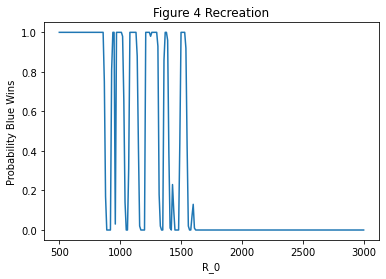

In [ ]:
sides = ['red', 'blue']
ManyReds = range(500,3010,10)
ProbabilityBWins=[0]*len(ManyReds)

for i in range(0,len(ManyReds)):
  ProbabilityBWins[i] = ThisRResult(ManyReds[i])

plt.plot(ManyReds,ProbabilityBWins)
plt.title("Figure 4 Recreation")
plt.xlabel("R_0")
plt.ylabel("Probability Blue Wins")
#plt.yticks((0.0, -1.0), ('Blue', 'Red'))
#labels = [0,500,1000,1500,2000,2500,3000]
#ax.set_xticklabels(labels)
plt.show()

#### 6. [5 points] Recreate Figure 5.

Same as Fig. 4, basically.

In [ ]:
#This is copied from the last problem, and I just edited the parameter ranges.
import random

RedFRatReinfThre = 2.5
RedFStrReinfThre = 0.8
BlueFRatReinfThre = 4
BlueFStrReinfThre = 0.8
RedFRatWithdrawThre = 1.5 
RedFStrWithdrawThre = 0.7
BlueFRatWithdrawThre = 10
BlueFStrWithdrawThre = 0.7

def OneRunFigFive(R_0, B_0):
  RedAttrThre = np.random.normal(2048,45.255)
  BlueAttrThre = np.random.normal(512, 22.627)
  RedOrBlue = Adj_Dewar_Sim(R_0, B_0, RedFRatReinfThre, RedFStrReinfThre, BlueFRatReinfThre, BlueFStrReinfThre, RedFRatWithdrawThre, RedFStrWithdrawThre, BlueFRatWithdrawThre, BlueFStrWithdrawThre, RedAttrThre, BlueAttrThre)
  if(RedOrBlue) == 'red':
    return 1
  else:
    return 0 

#Same as before...
#B_0 is always 500
B_0 = 500

def ThisRResult(R_0):
  RunningSum = 0
  for i in range(1,101):
    RunningSum = RunningSum + OneRunFigFive(R_0, B_0)
  finalProportion = RunningSum/100
  return(finalProportion)

#Test:
#ThisRResult(1000)

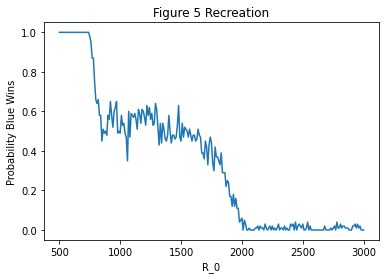

In [ ]:
sides = ['red', 'blue']
ManyReds = range(500,3010,10)
ProbabilityBWins=[0]*len(ManyReds)

for i in range(0,len(ManyReds)):
  ProbabilityBWins[i] = ThisRResult(ManyReds[i])

plt.plot(ManyReds,ProbabilityBWins)
plt.title("Figure 5 Recreation")
plt.xlabel("R_0")
plt.ylabel("Probability Blue Wins")
#plt.yticks((0.0, -1.0), ('Blue', 'Red'))
#labels = [0,500,1000,1500,2000,2500,3000]
#ax.set_xticklabels(labels)
plt.show()

#### 7. [5 points] Recreate Figure 6.

A combination of the random elements from previous plot recreations.

In [ ]:
#This is copied from the last problem, and I just edited the parameter ranges.
import random

RedFRatReinfThre = random.uniform(2,3)
RedFStrReinfThre = random.uniform(0.64,0.96)
BlueFRatReinfThre = random.uniform(3.2, 4.8)
BlueFStrReinfThre = random.uniform(0.64,0.96)
RedFRatWithdrawThre = random.uniform(1.2, 1.8)
RedFStrWithdrawThre = random.uniform(0.56, 0.84)
BlueFRatWithdrawThre = random.uniform(8,12)
BlueFStrWithdrawThre = random.uniform(0.56, 0.84)

def OneRunFigSix(R_0, B_0):
  RedAttrThre = np.random.normal(2048,45.255)
  BlueAttrThre = np.random.normal(512, 22.627)
  RedOrBlue = Adj_Dewar_Sim(R_0, B_0, RedFRatReinfThre, RedFStrReinfThre, BlueFRatReinfThre, BlueFStrReinfThre, RedFRatWithdrawThre, RedFStrWithdrawThre, BlueFRatWithdrawThre, BlueFStrWithdrawThre, RedAttrThre, BlueAttrThre)
  if(RedOrBlue) == 'red':
    return 1
  else:
    return 0 

#Same as before...
#B_0 is always 500
B_0 = 500

def ThisRResult(R_0):
  RunningSum = 0
  for i in range(1,101):
    RunningSum = RunningSum + OneRunFigSix(R_0, B_0)
  finalProportion = RunningSum/100
  return(finalProportion)

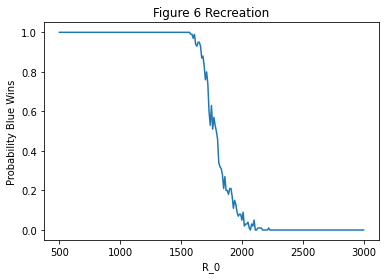

In [ ]:
sides = ['red', 'blue']
ManyReds = range(500,3010,10)
ProbabilityBWins=[0]*len(ManyReds)

for i in range(0,len(ManyReds)):
  ProbabilityBWins[i] = ThisRResult(ManyReds[i])

plt.plot(ManyReds,ProbabilityBWins)
plt.title("Figure 6 Recreation")
plt.xlabel("R_0")
plt.ylabel("Probability Blue Wins")
#plt.yticks((0.0, -1.0), ('Blue', 'Red'))
#labels = [0,500,1000,1500,2000,2500,3000]
#ax.set_xticklabels(labels)
plt.show()